In [79]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
diabetes = load_diabetes()

In [80]:
# data
df_X = np.array(diabetes.data) #(442,10)
df_y = np.array(diabetes.target) # (442,)

In [162]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y)

In [163]:
# W, b
W = np.random.rand(10)
b = np.random.rand()
print(W,b)

[0.91783529 0.74558719 0.78200911 0.620682   0.63871492 0.15336709
 0.88542632 0.8620046  0.55949304 0.57529151] 0.7774011770433145


In [83]:
# model
def model(X, W, b):
    pred = 0
    for i in range(10):
        pred += X[:, i] * W[i]
    pred += b
    return pred

In [84]:
# loss
def loss_MSE(y, y_pred):
    loss = ((y - y_pred)**2).mean()
    return loss

In [85]:
# gradient
def gradient(X, y, y_pred):
    N = len(y)
    grad_w = 1/N * 2 * X.T.dot(y_pred - y)
    grad_b = 2 * (y_pred - y).mean()
    return grad_w, grad_b

In [164]:
# learning rate
lr = 0.5

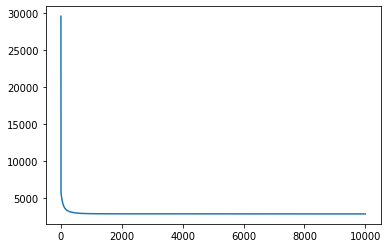

In [165]:
# model training
losses = []

for i in range(1, 10001):
    y_pred = model(X_train, W, b)
    dW, db = gradient(X_train, y_train, y_pred)
    W -= lr * dW
    b -= lr * db
    L = loss_MSE(y_train, y_pred)
    losses.append(L)

plt.plot(losses)
plt.show()

In [166]:
# test set
prediction = model(X_test, W, b)
print(W,b)
mse = loss_MSE(y_test, prediction)
print(mse)

[ -35.42693009 -212.80397961  483.38807119  361.28834666 -228.05972121
   57.24312001 -123.22731768  148.08867803  510.31049287   85.60854916] 154.46937628962175
2926.3526732248824


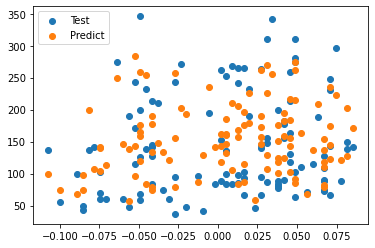

In [167]:
# visualizing
plt.scatter(X_test[:, 0], y_test, label='Test')
plt.scatter(X_test[:, 0], prediction, label='Predict')
plt.legend()
plt.show()